In [46]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.8.2 (default, Mar 26 2020, 10:43:30) 
# [Clang 4.0.1 (tags/RELEASE_401/final)].

# The Numpy version is 1.19.2.

# The Pandas version is 1.2.1.

# The Matplotlib version is 3.3.2.

# The Scikit-Learn version is 0.23.2.

The Python version is 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ].

The Numpy version is 1.21.5.

The Pandas version is 1.4.3.

The Matplotlib version is 3.5.1.

The Scikit-Learn version is 1.1.1.



# Exercise 2: Loading the Case Study Data in a Jupyter Notebook

# First Jupyter notebook
Welcome to your first jupyter notebook! The first thing to know about Jupyter notebooks is that there are two kinds of cells. This is a markdown cell.

There are a lot of different ways to mark up the text in markdown cells, including __bold__ and *italics*.

The next one will be a `code` cell.

In [47]:
import pandas as pd

Load data

In [48]:
df = pd.read_excel('../../Data/default_of_credit_card_clients'
                   '__courseware_version_1_21_19.xls')

In [49]:
df.shape

(30000, 25)

# Exercise 3: Verifying Basic Data Integrity

The data consist of one month of credit card account information, with historical data looking back six months. A basic quality check is to make sure that we have data for as many accounts as we think we do. In particular, account IDs should all be distinct. We can check to see the number of distinct ID's with the Pandas function `.nunique()`.

In [50]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [51]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
df.shape

(30000, 25)

In [53]:
df['ID'].nunique()

29687

Has less than the number of rows, so there are some duplicates somewhere.

In [54]:
id_counts = df['ID'].value_counts()
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [55]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean masks

In [56]:
import numpy as np
from numpy.random import default_rng

In [57]:
rg = default_rng(12345)

In [58]:
random_integers = rg.integers(low=1,high=5,size=100)

In [59]:
random_integers[:5]

array([3, 1, 4, 2, 1])

In [60]:
is_equal_to_3 = random_integers == 3

In [61]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [62]:
sum(is_equal_to_3)

31

In [63]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

# Exercise 4: Continuing Verification of Data Integrity

In [64]:
dupe_mask = id_counts == 2

In [65]:
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [66]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [67]:
dupe_ids = id_counts.index[dupe_mask]

In [68]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [69]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [70]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see some duplicates here, and it looks like every duplicate ID has one row with data, and another row with all zeros. Is this the case for every duplicate ID? Let's check.

In [71]:
df.shape

(30000, 25)

In [72]:
df_zero_mask = df == 0

In [73]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [74]:
sum(feature_zero_mask)

315

It looks like there are at least as many "zero rows" as there are duplicate IDs. Let's remove all the rows with all zero features and response, and see if that gets rid of the duplicate IDs.

In [75]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [76]:
df_clean_1.shape

(29685, 25)

In [77]:
df_clean_1['ID'].nunique()

29685

Looks like this worked.

# Exercise 5: Exploring and Cleaning the Data

In [78]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [79]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [80]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [81]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Let's throw out these missing values, which were initially hidden from us in the `.info()` output, now.

In [82]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [83]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [84]:
sum(valid_pay_1_mask)

26664

In [85]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [86]:
df_clean_2.shape

(26664, 25)

In [87]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [88]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [89]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


# Exercise 6: Exploring the Credit Limit and Demographic Features

In [90]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures

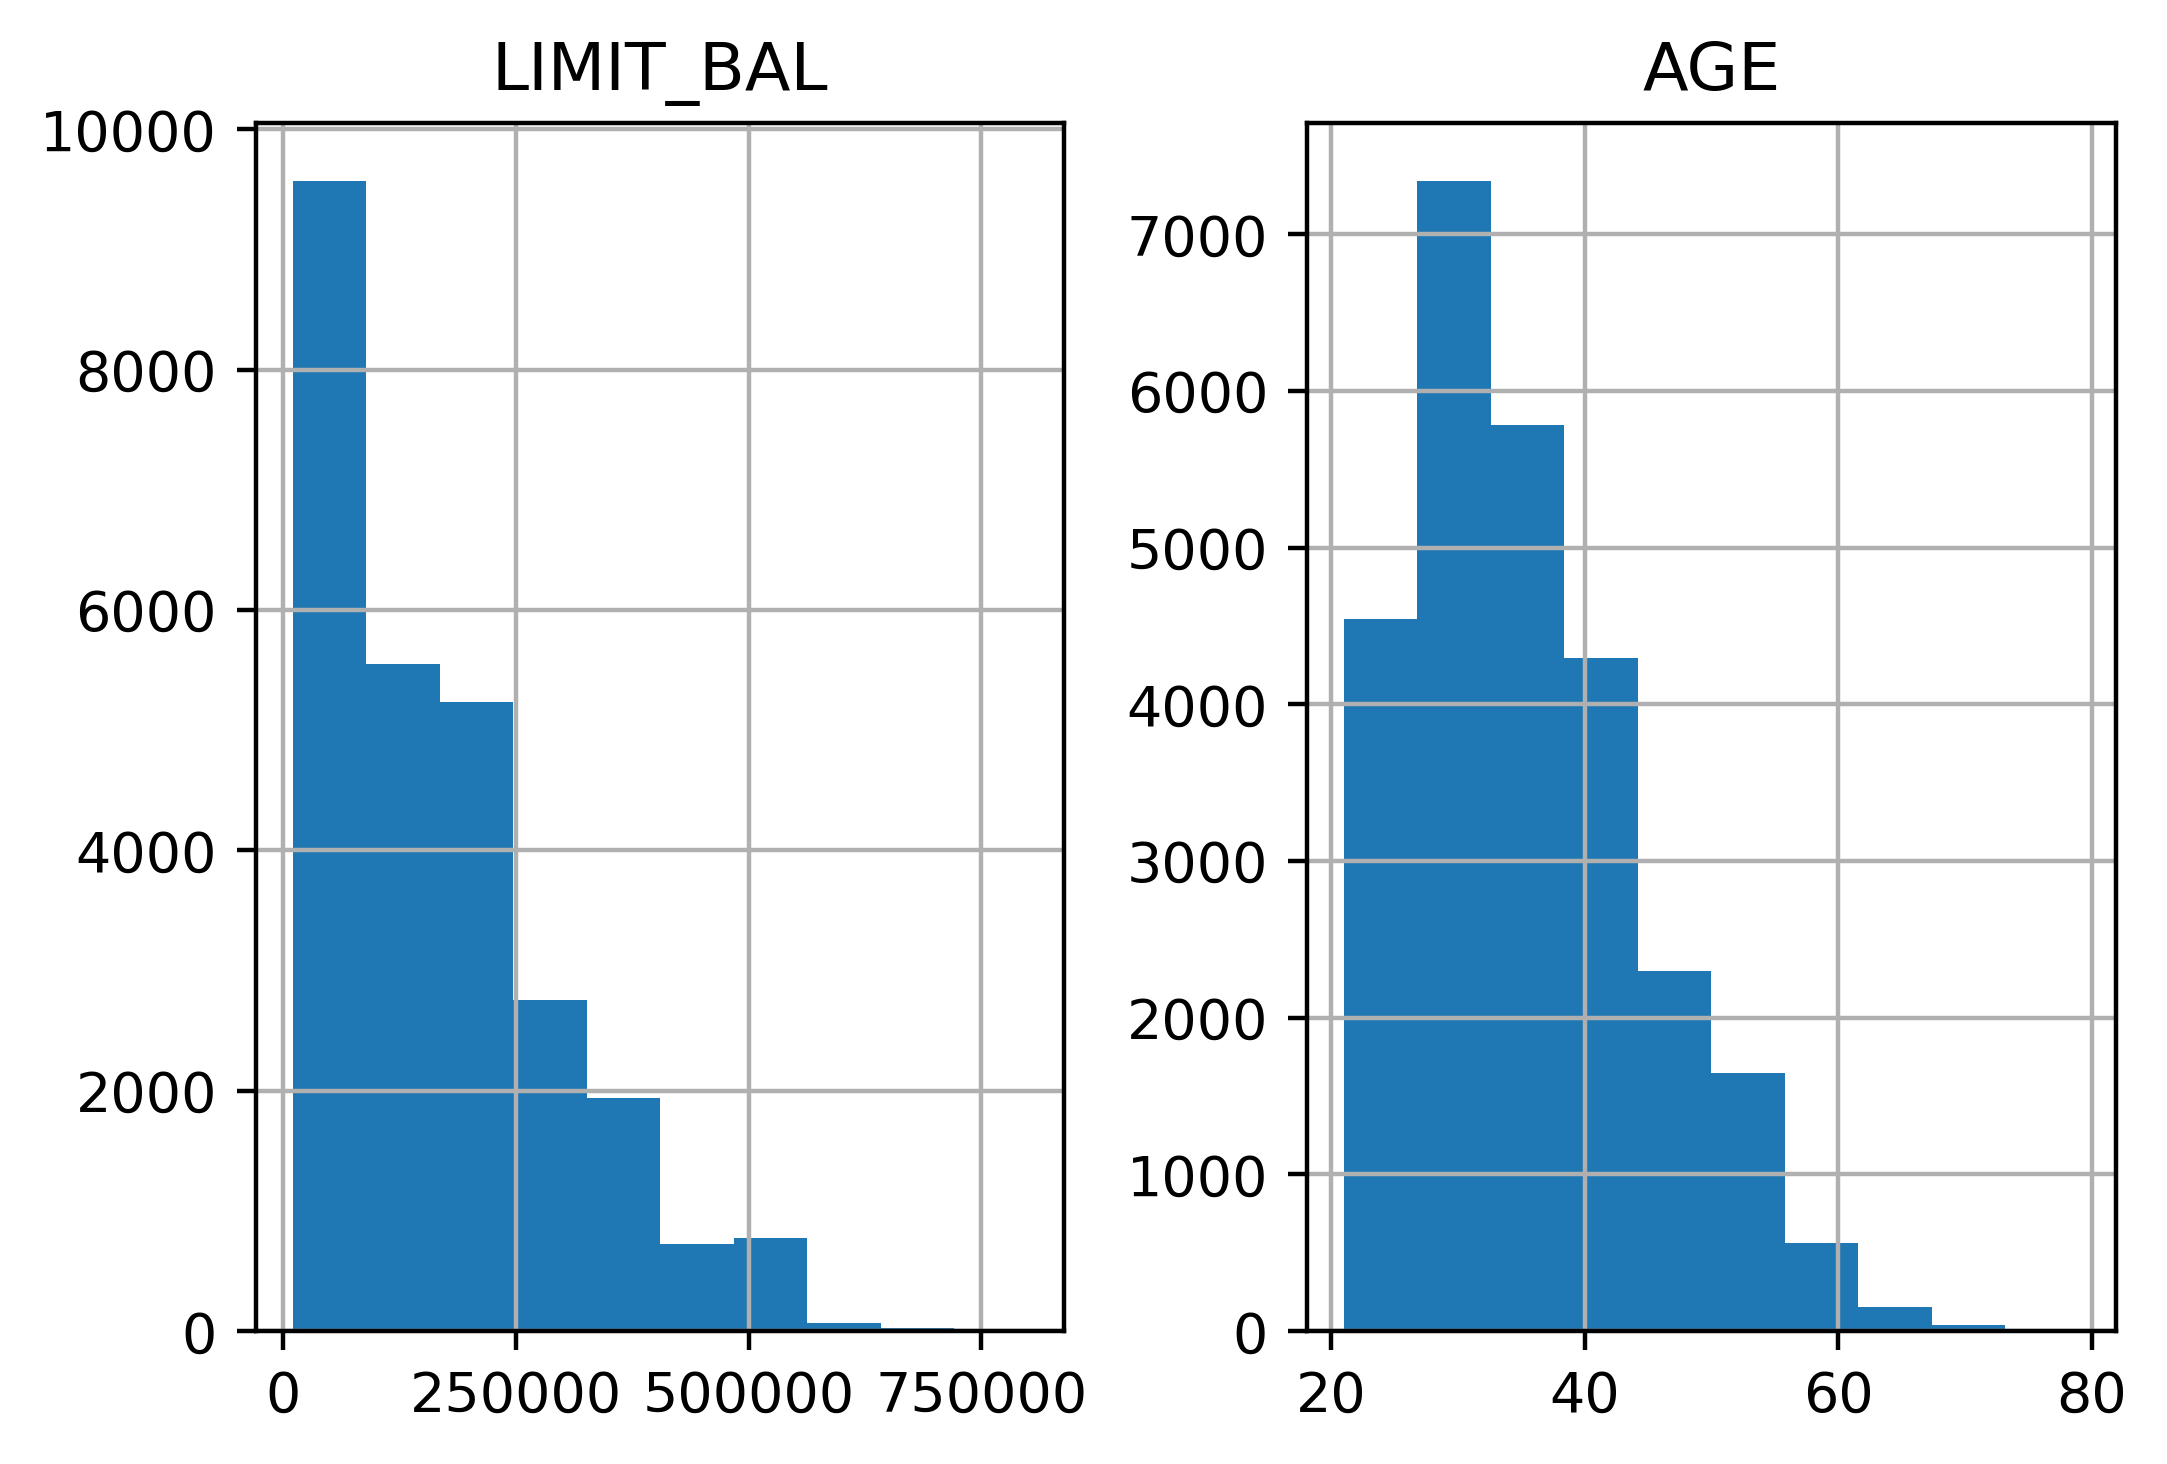

In [91]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist();

In [92]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [93]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [94]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [95]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Examine and clean marriage feature as well:

In [96]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [97]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [98]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep dive: categorical features

In [99]:
from scipy import stats
import numpy as np

Generate some synthetic near-linear data:

In [100]:
X = np.array(range(1,11))

In [101]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [102]:
np.random.seed(seed=24)
Y = 2*X + np.random.normal(0, 1, 10)

In [103]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X,Y)

([<matplotlib.axis.YTick at 0x7fe9536d5070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

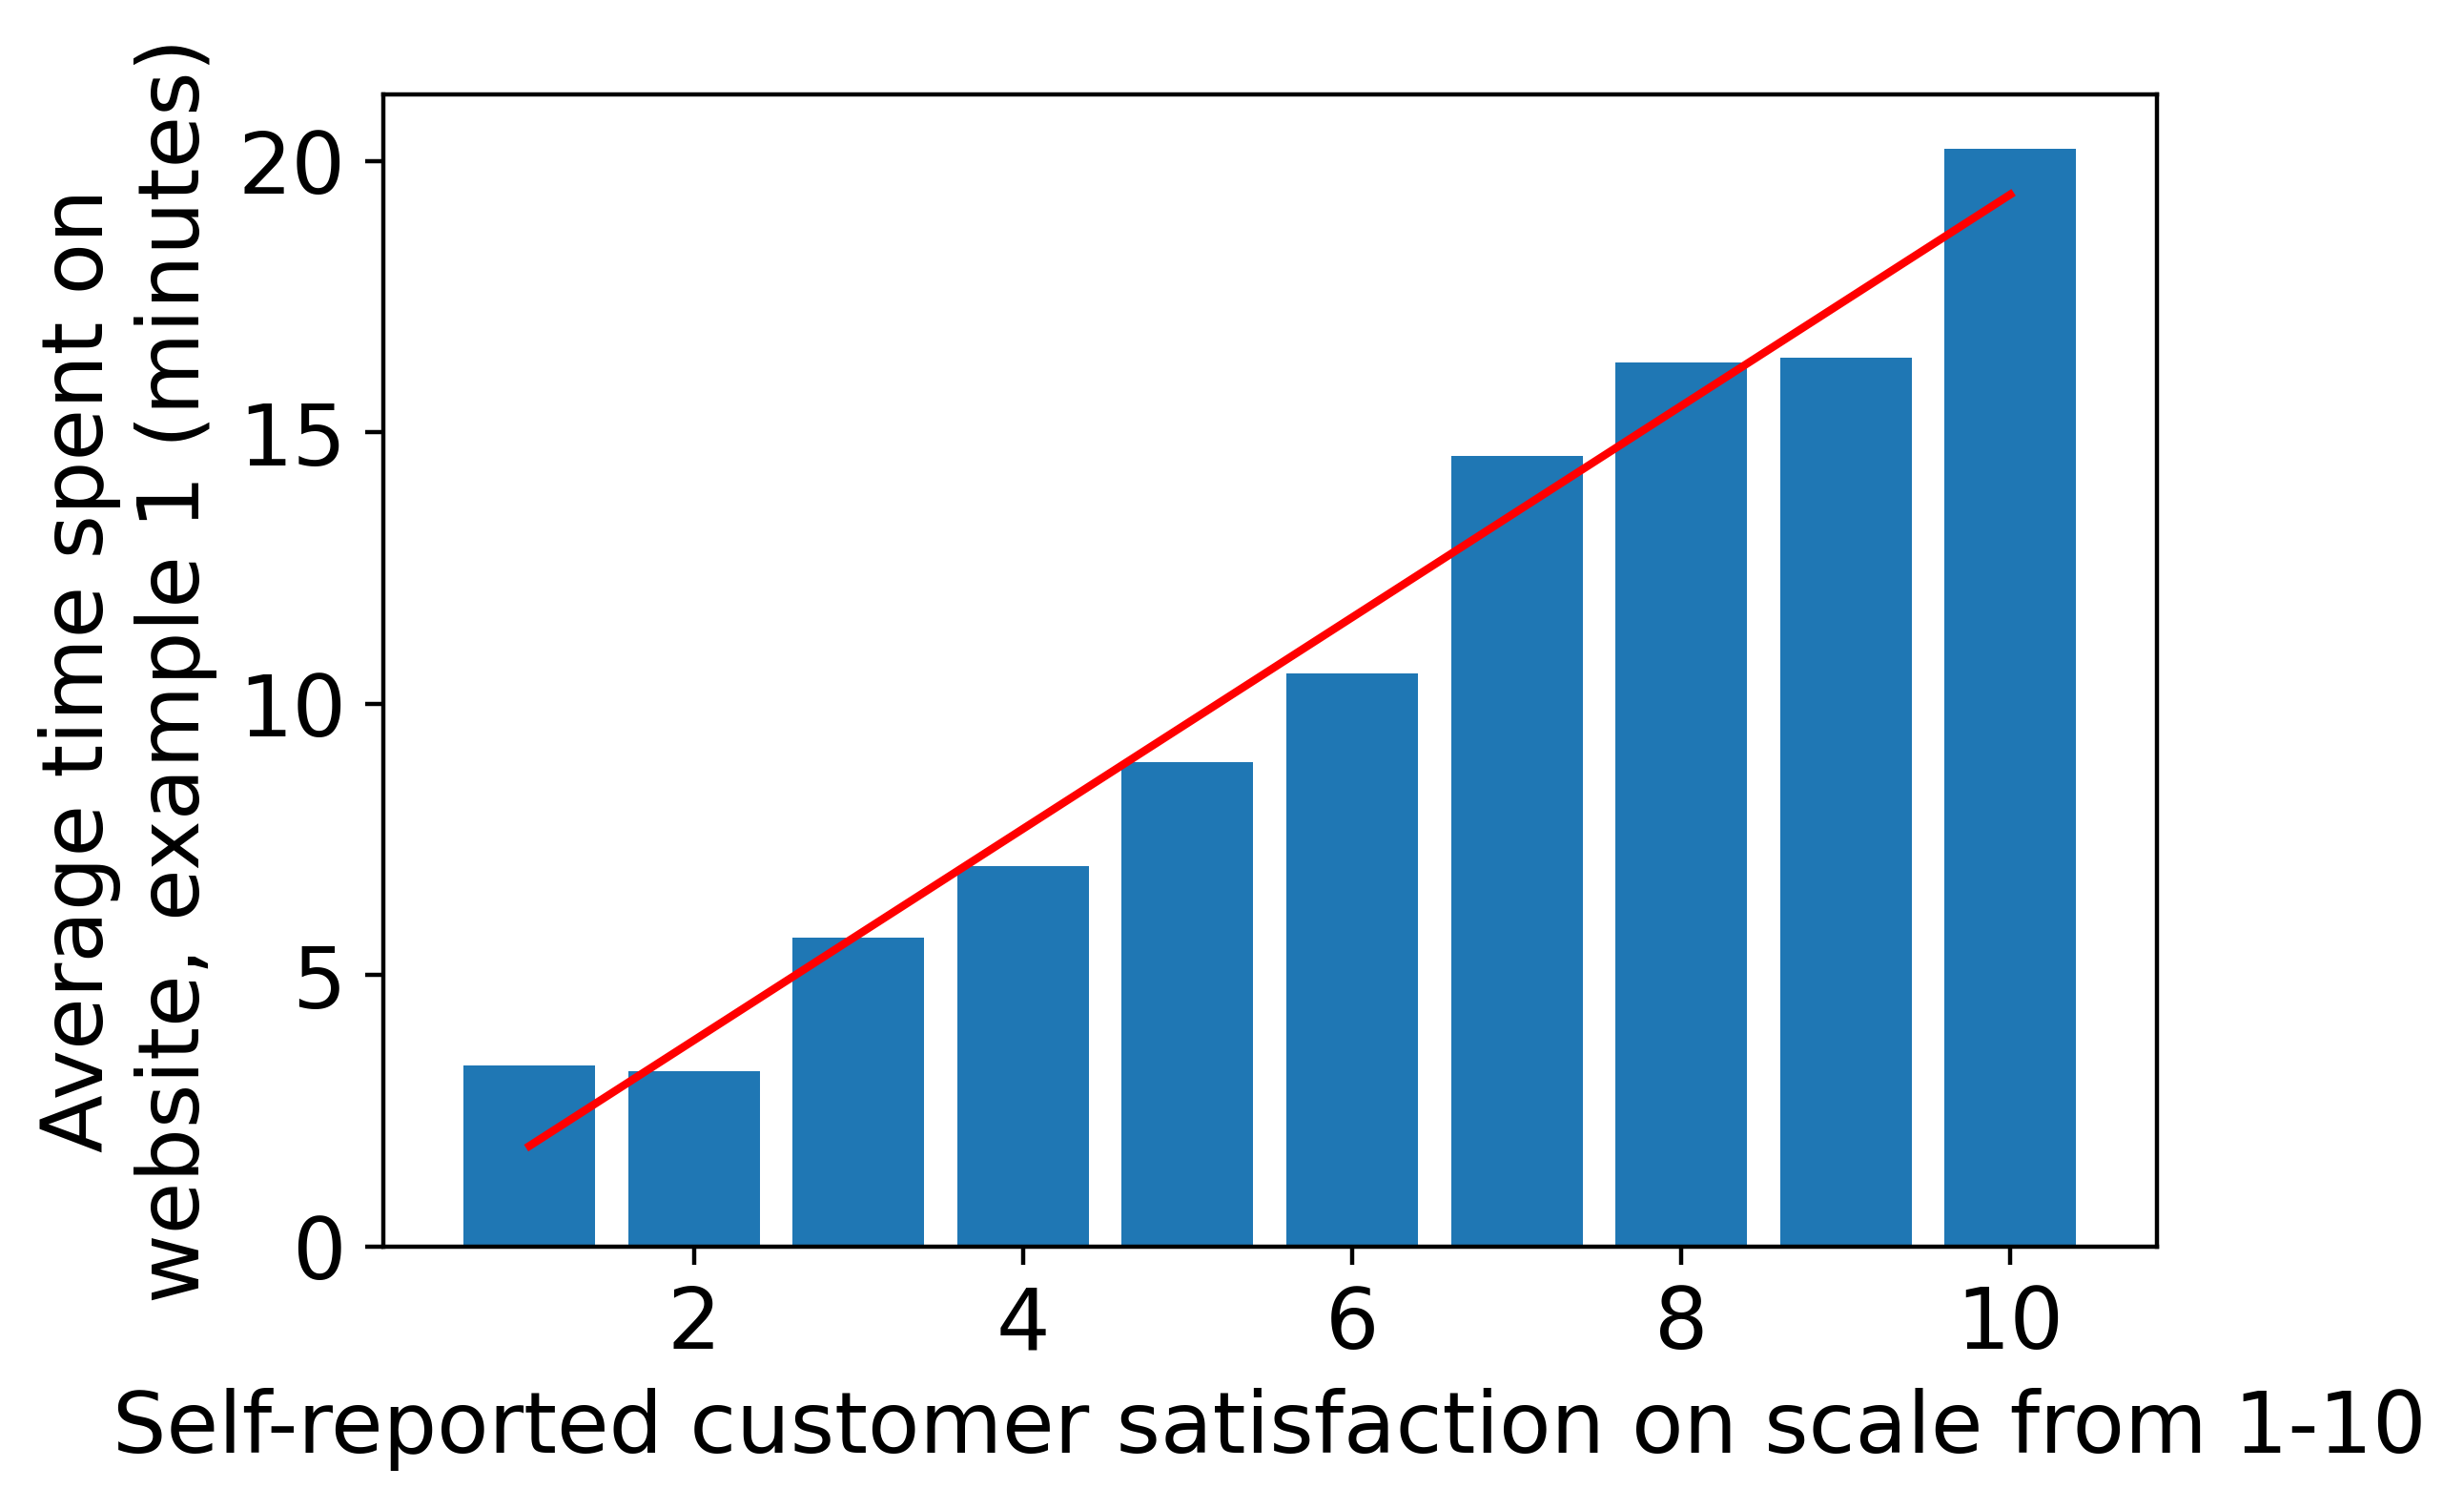

In [104]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 16
plt.plot(X, intercept_line + slope_line*X, 'r-')
plt.bar(X,Y, align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.yticks(range(0,25,5))

And some synthetic polynomial data

In [105]:
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1*(X-2)*(X-9) + 10 + noise

In [106]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X,Y_poly)

Text(0, 0.5, 'Average time spent on\nwebsite, example 2 (minutes)')

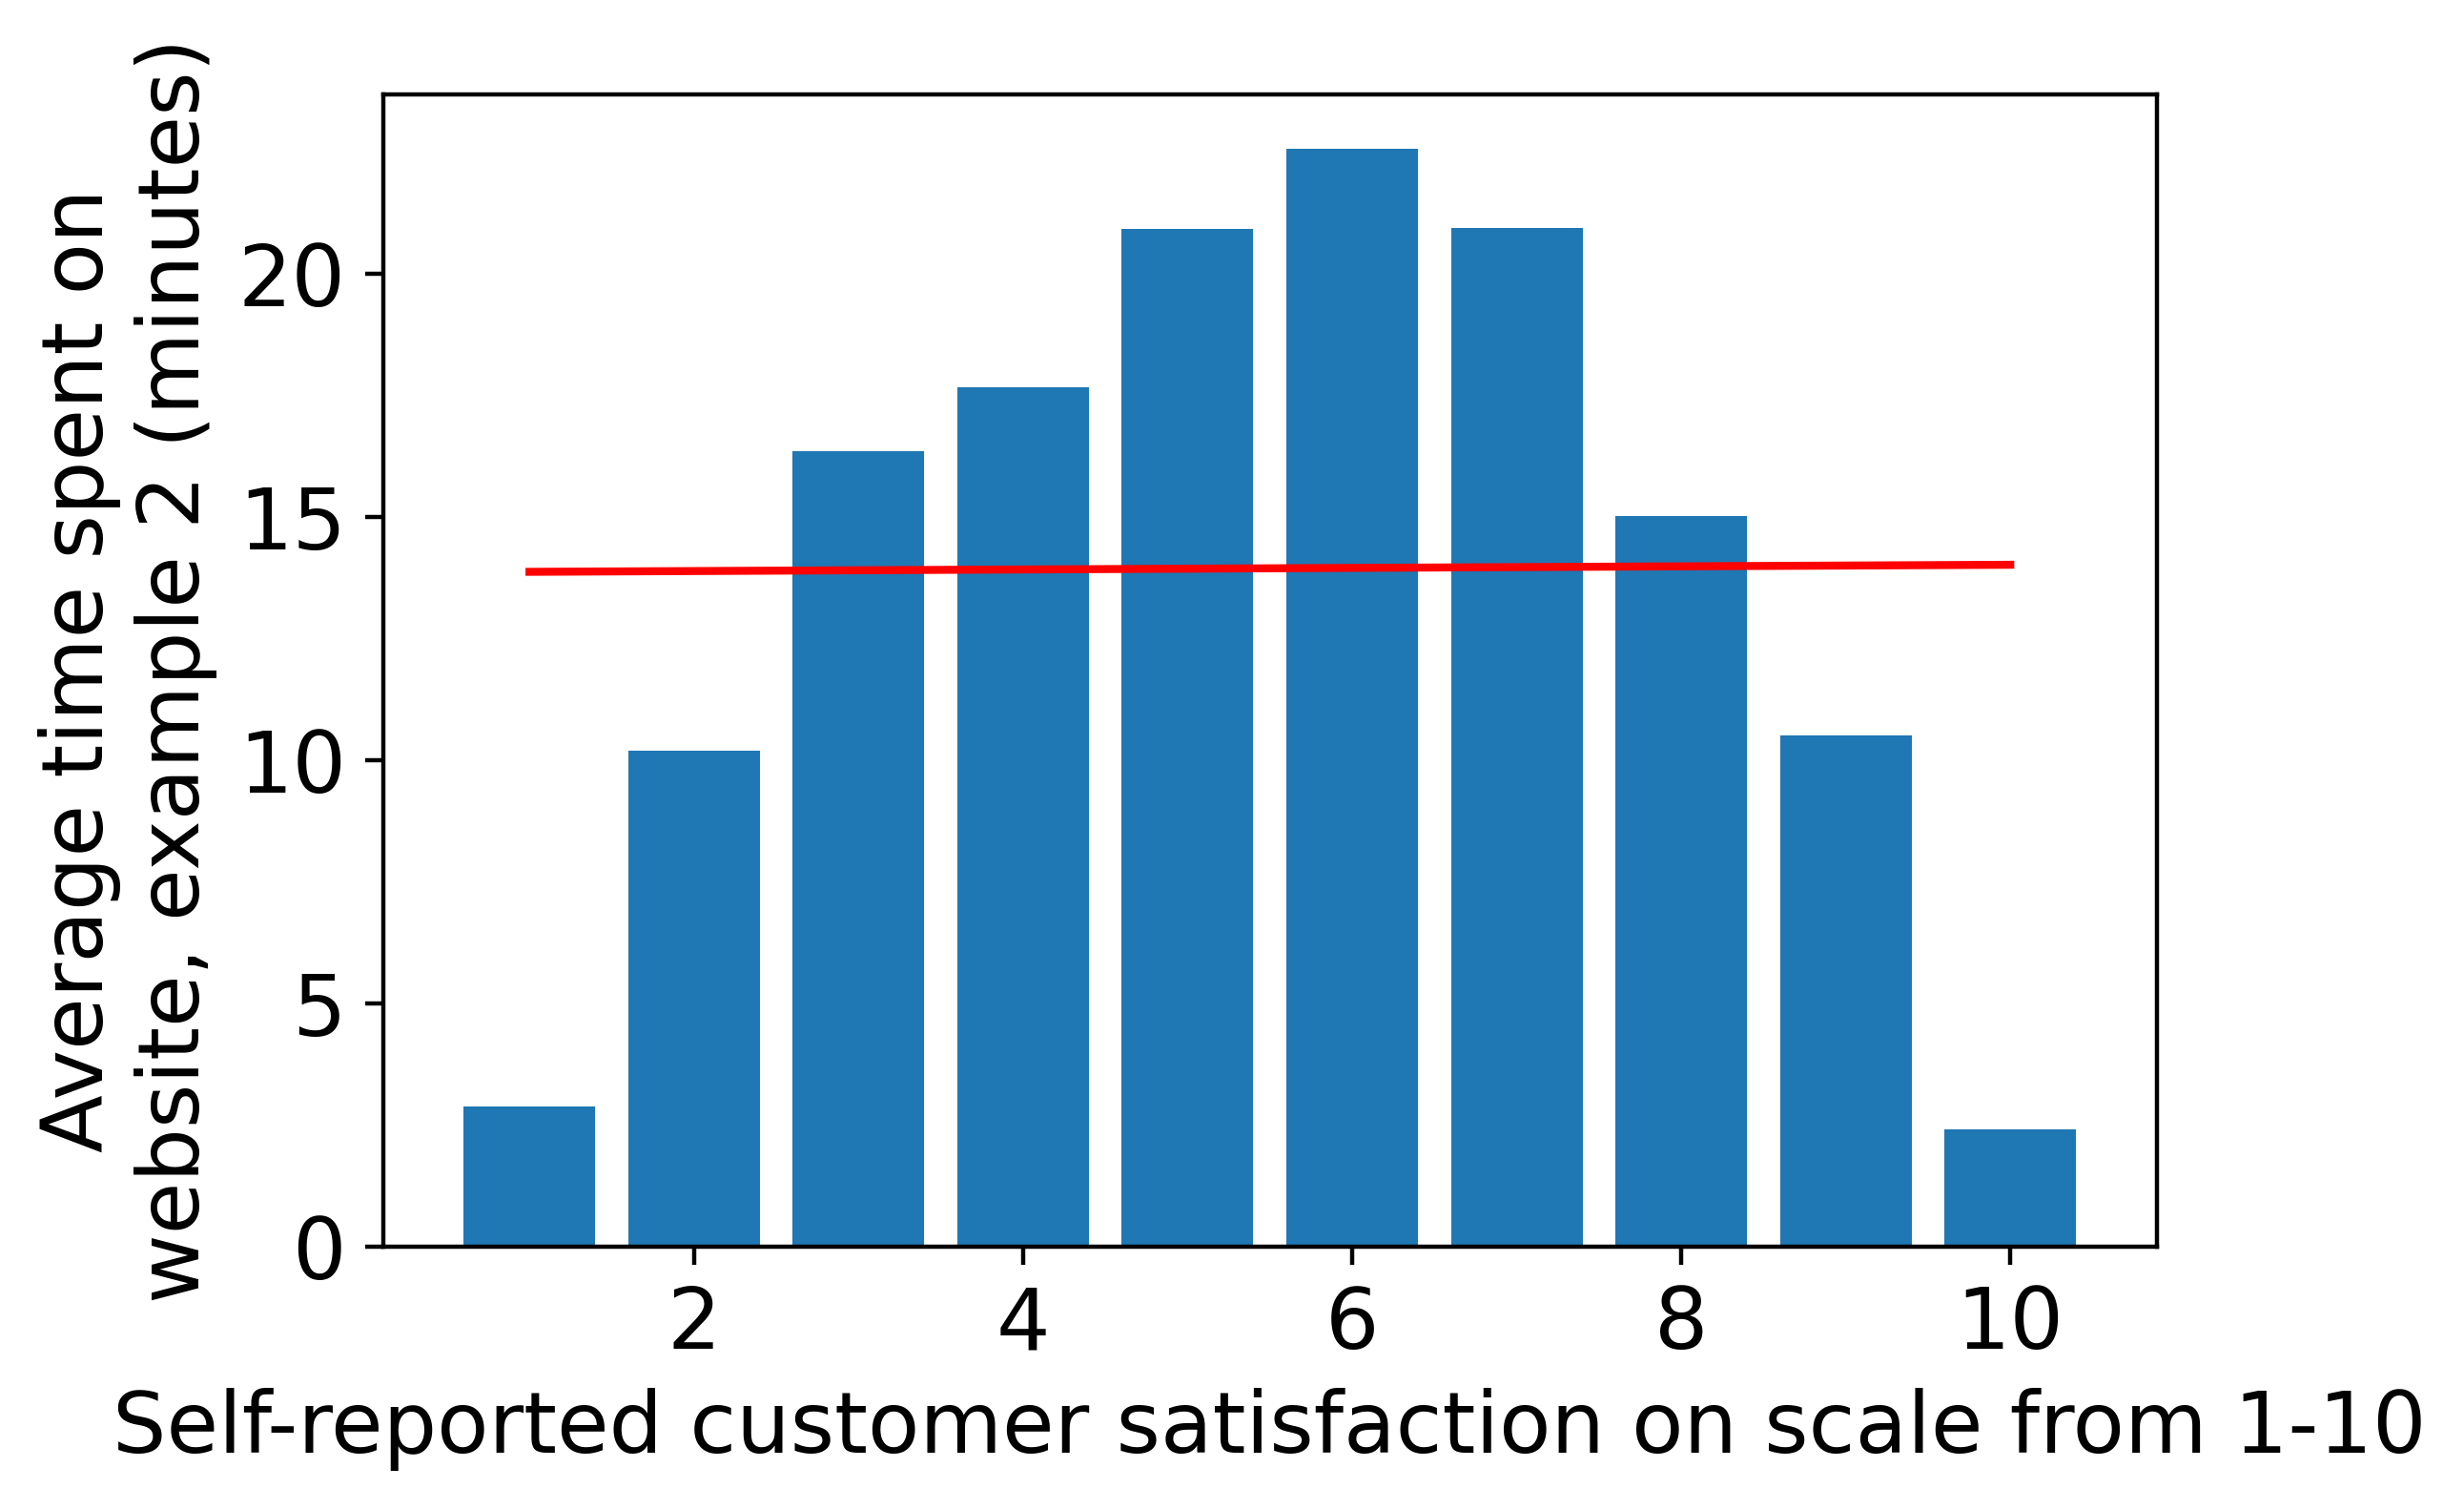

In [107]:
plt.plot(X, intercept_poly + slope_poly*X, 'r-')
plt.bar(X,Y_poly,align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')

In [108]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

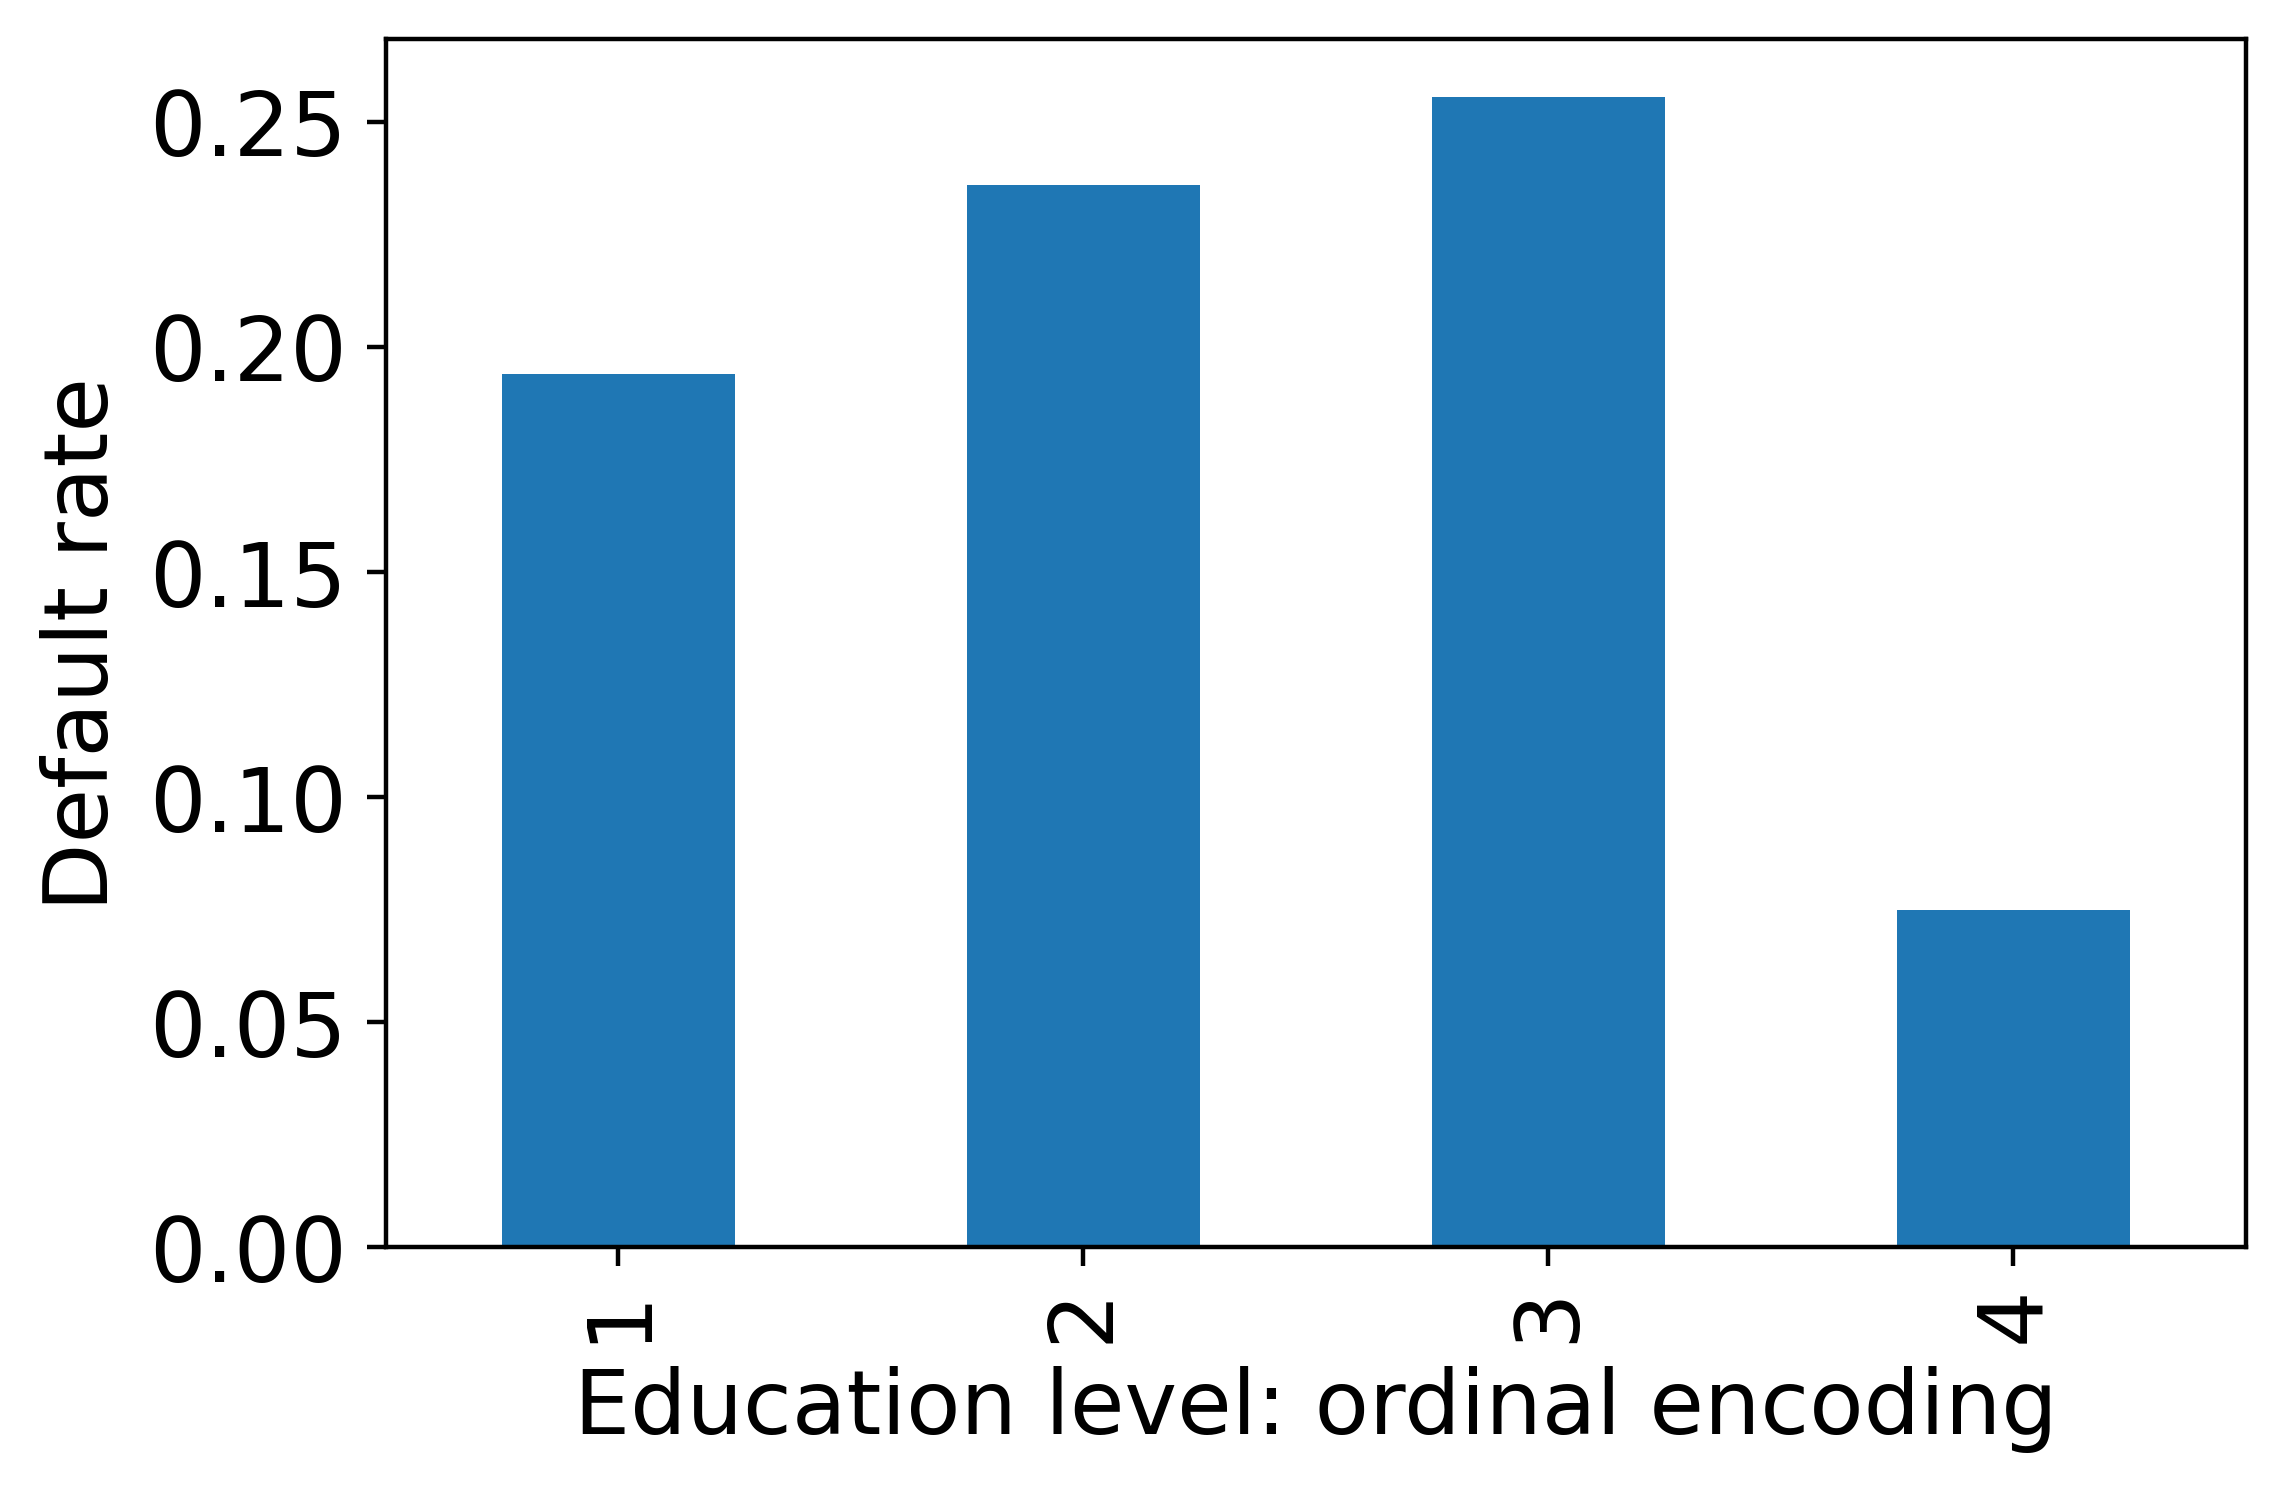

In [109]:
df_clean_2.groupby('EDUCATION').agg({'default payment next '
                                     'month':'mean'})\
                               .plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

# Exercise 7: Implementing One-Hot Encoding for a Categorical Feature

In [110]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

Make a new column of categorical strings, using the data dictionary

In [111]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [112]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [113]:
cat_mapping = {1: "graduate school",
               2: "university",
               3: "high school",
               4: "others"}

In [114]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION']\
                              .map(cat_mapping)

In [115]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [116]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [117]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


Save the fruits of your exploratory labors

In [142]:
df_with_ohe.to_csv('../../Data/Chapter_1_cleaned_data.csv', index=False)

# Exploring the Financial History Features in the Dataset

In [119]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [120]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [121]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [122]:
df.shape

(26664, 30)

In [123]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
             'PAY_6']

In [124]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [125]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [126]:
pay_feats[0]

'PAY_1'

<AxesSubplot:>

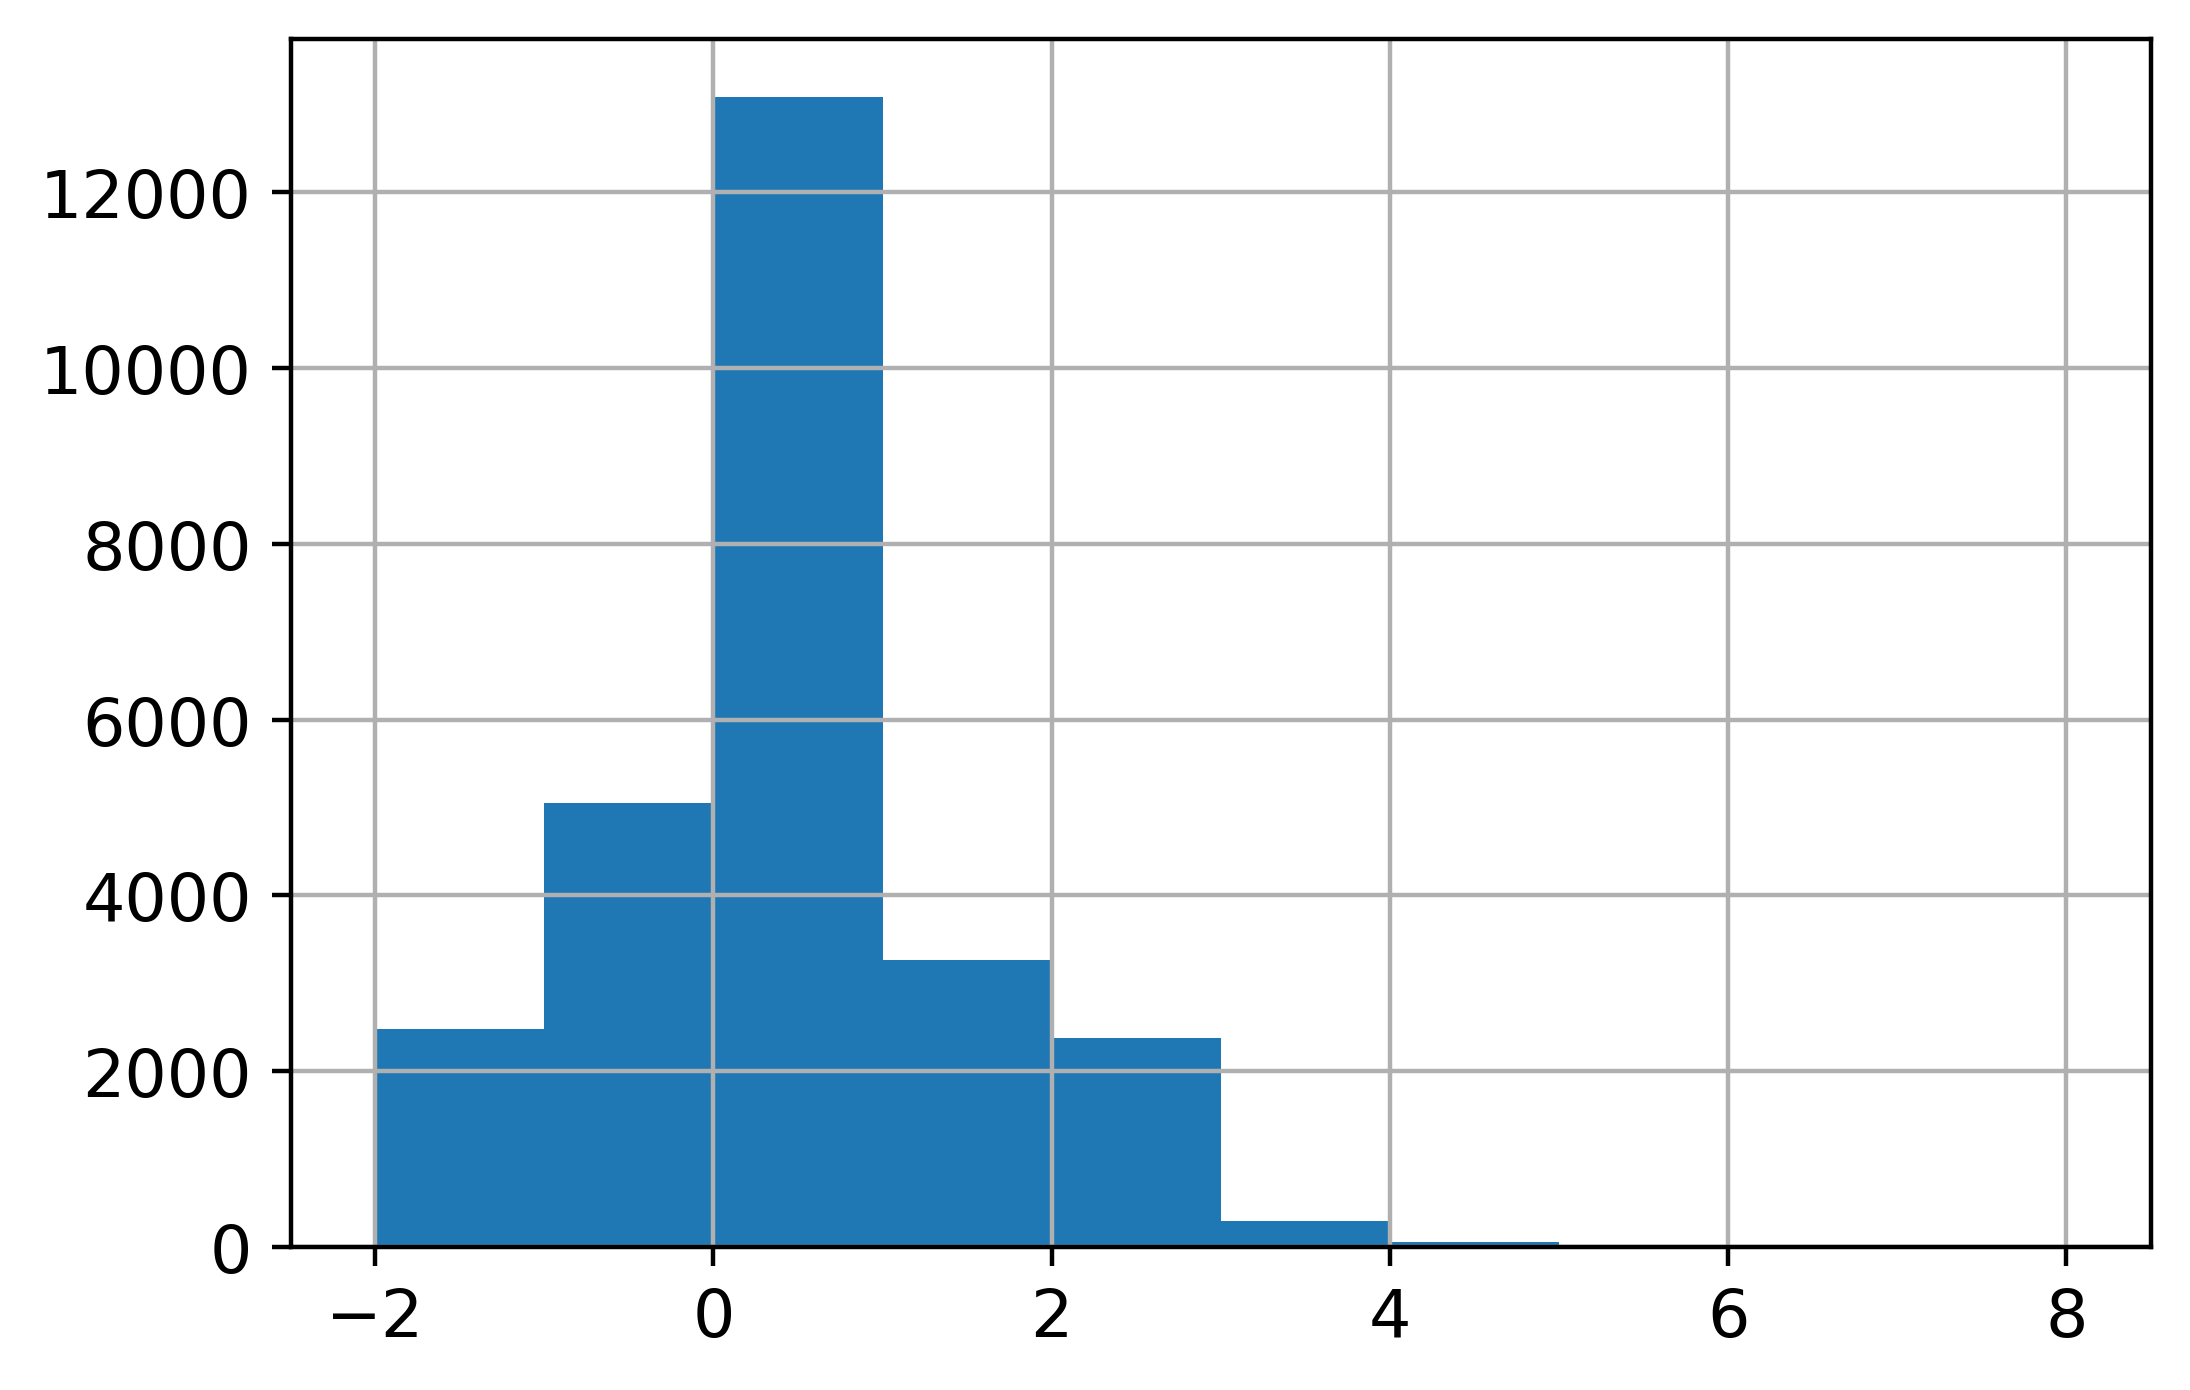

In [127]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12
df[pay_feats[0]].hist()

In [128]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

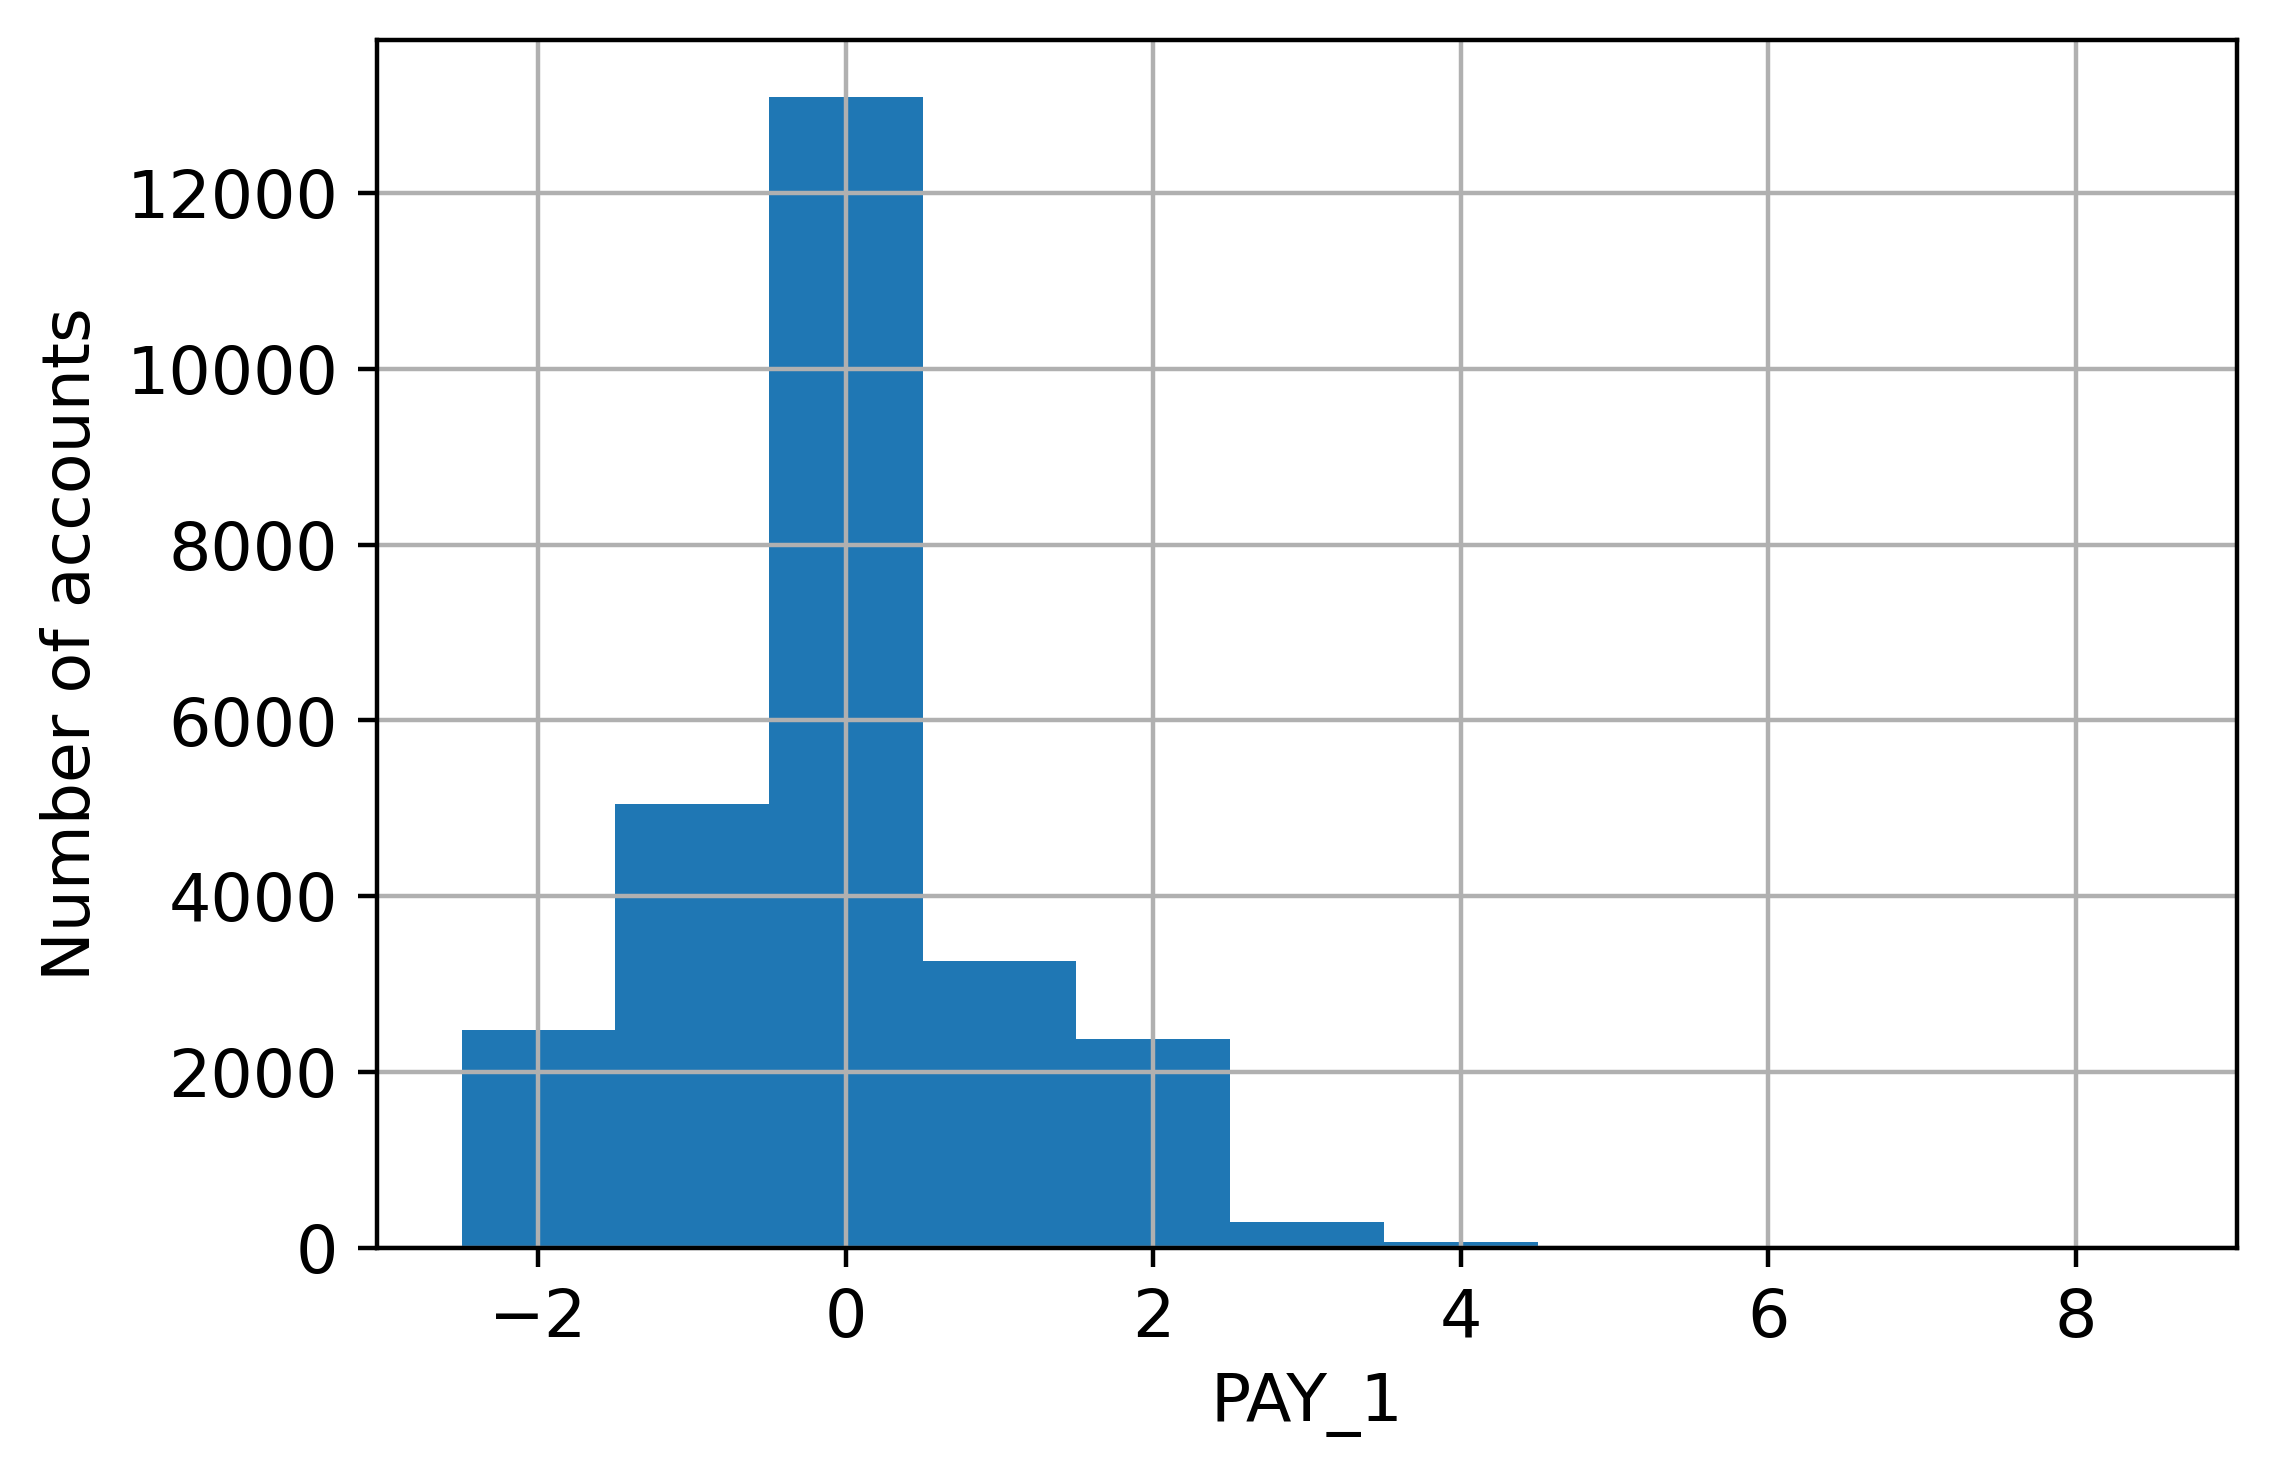

In [129]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [130]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

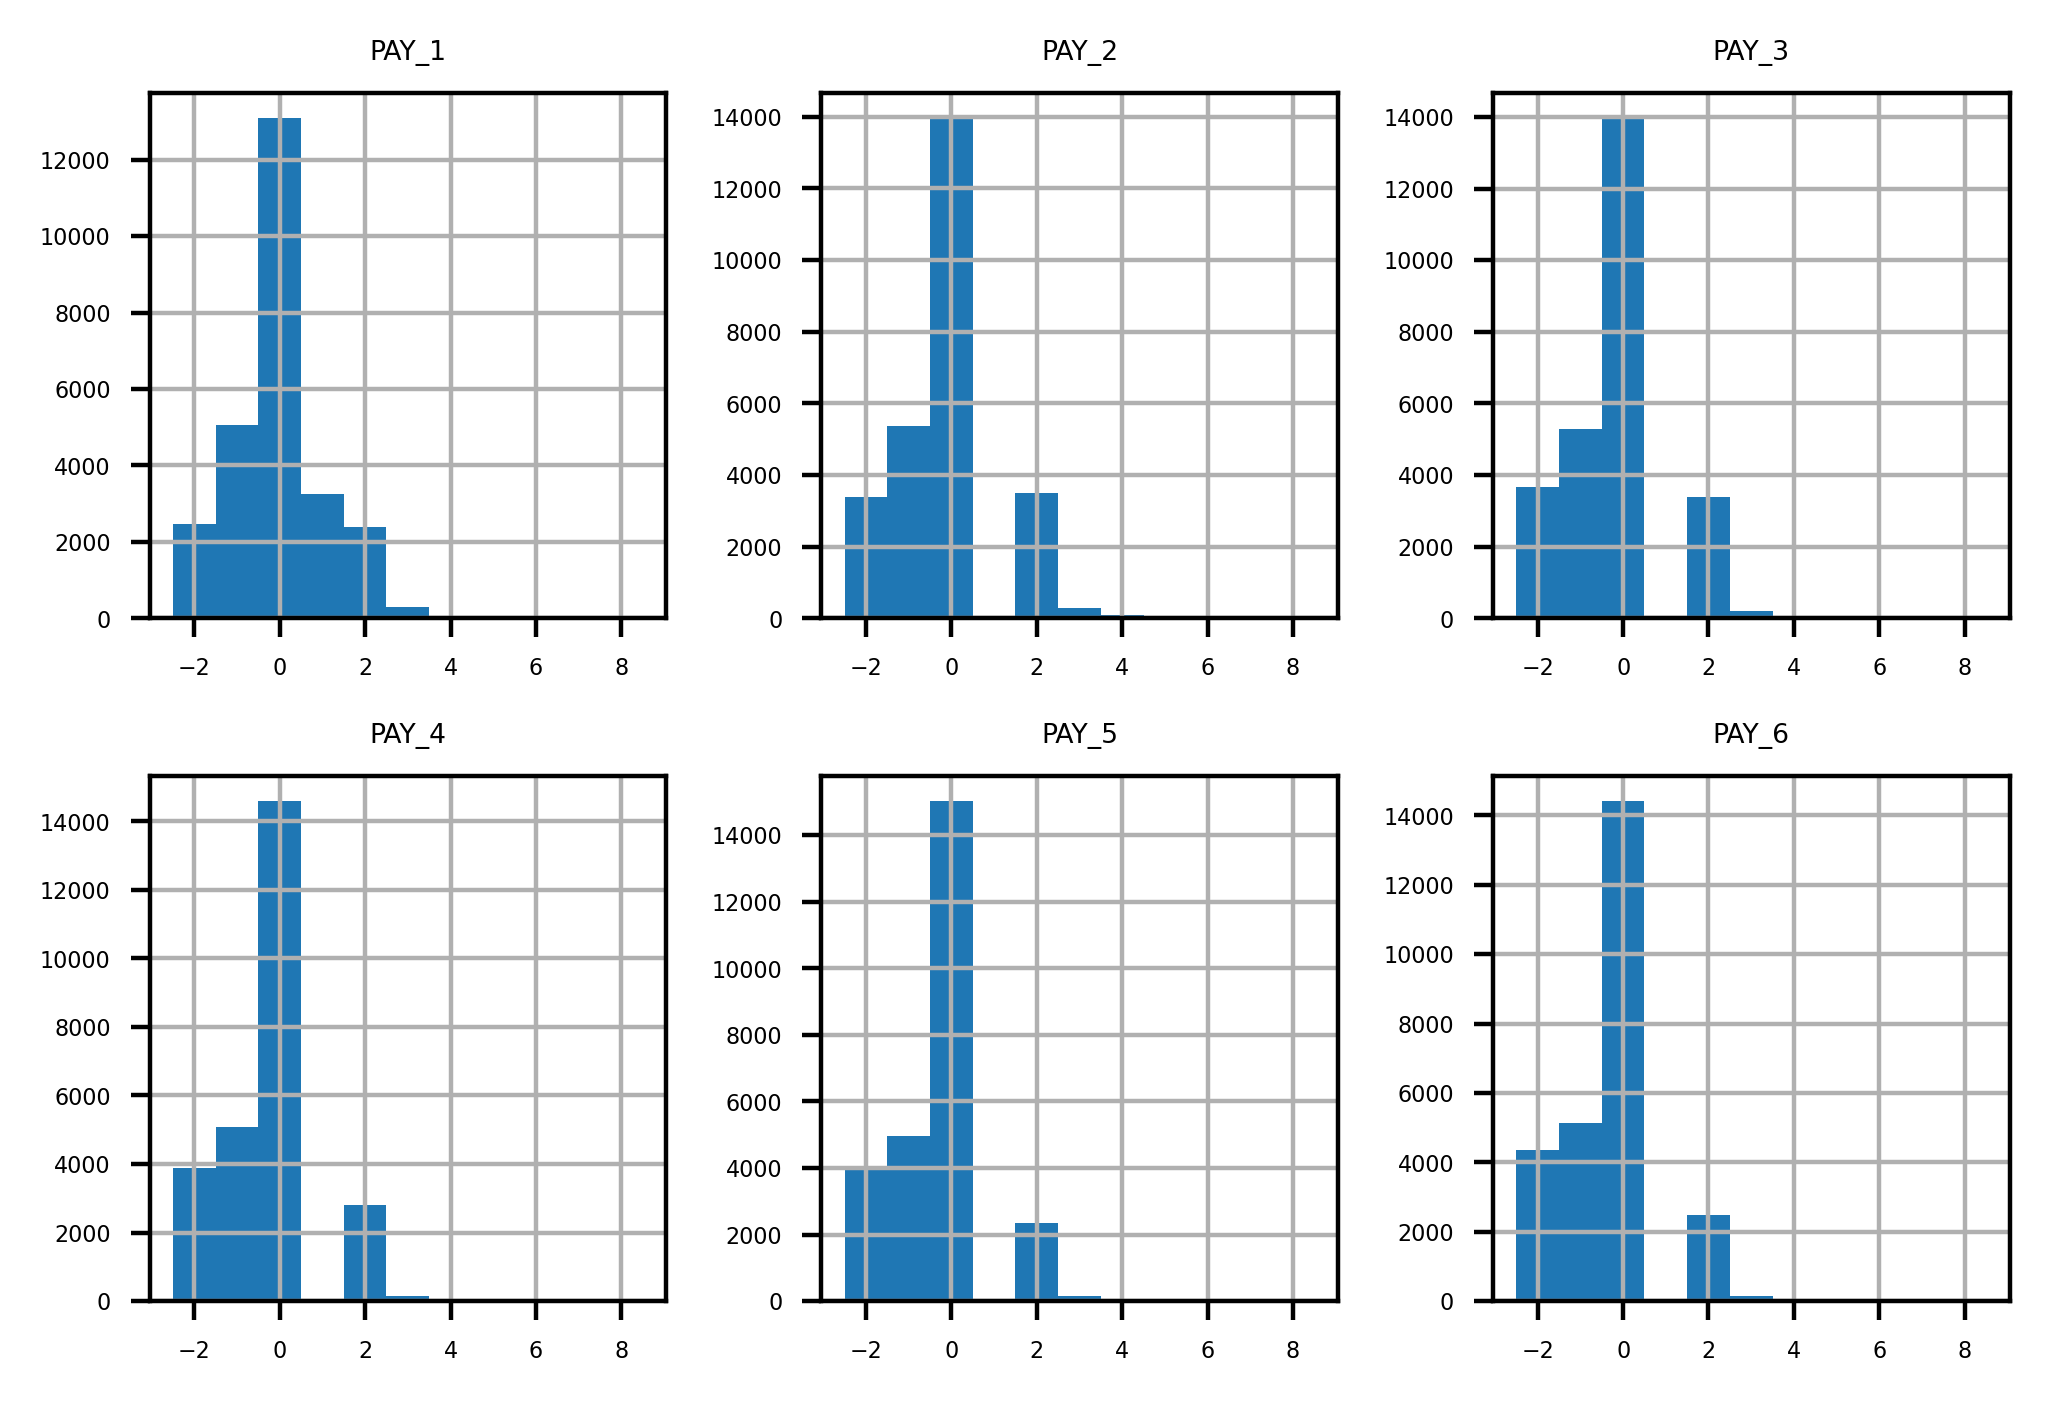

In [131]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [132]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


# Activity 1: Exploring Remaining Financial Features in the Dataset

In [133]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [134]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

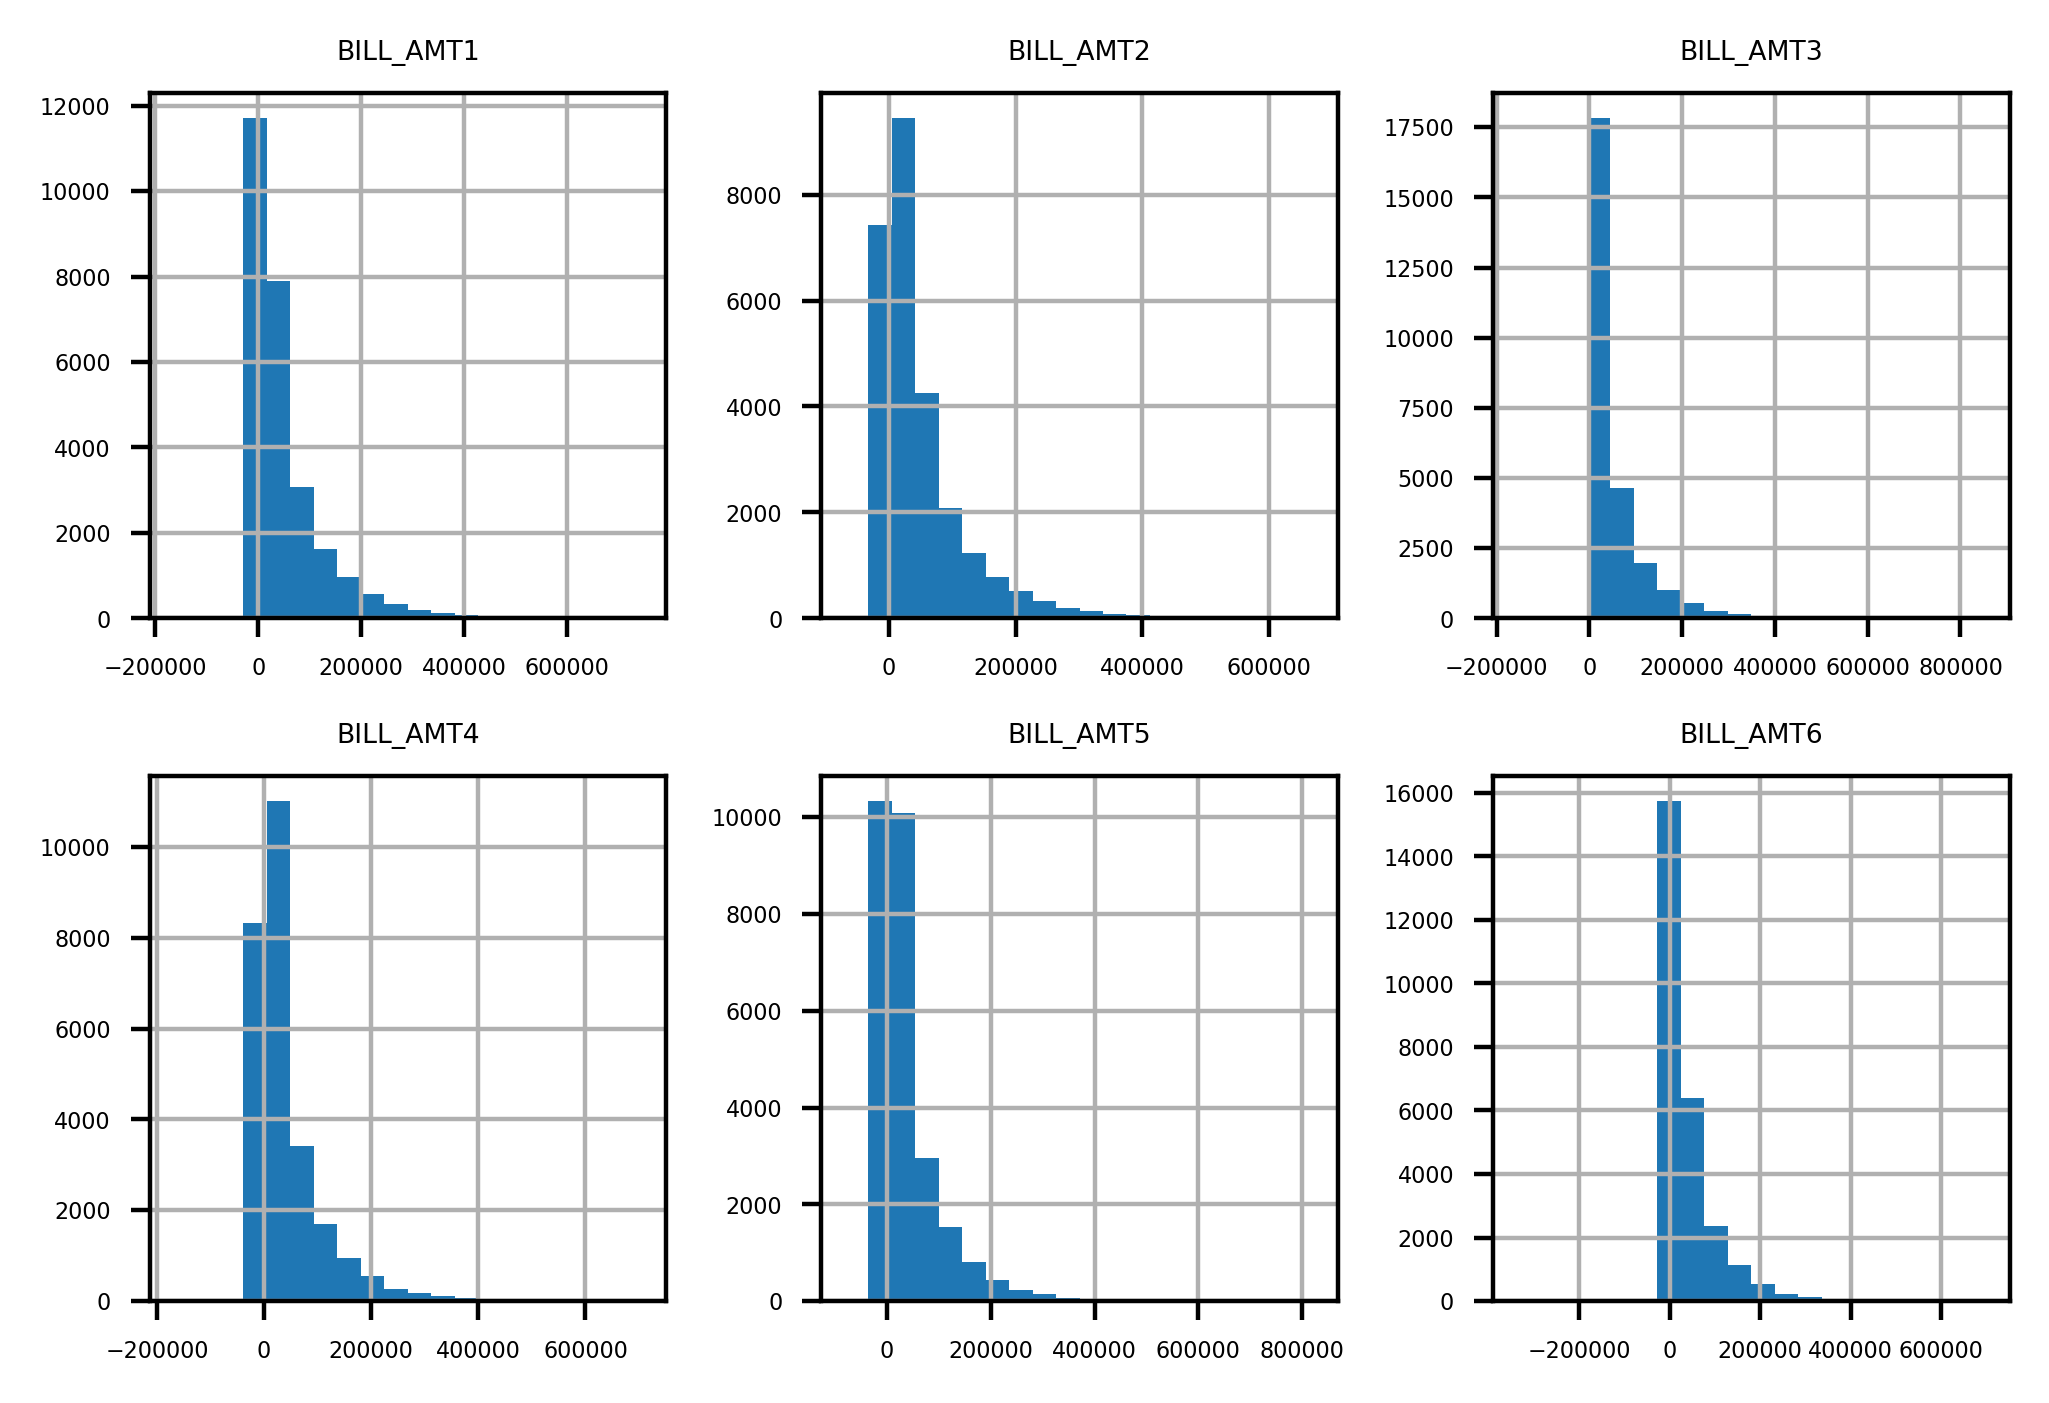

In [135]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [136]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

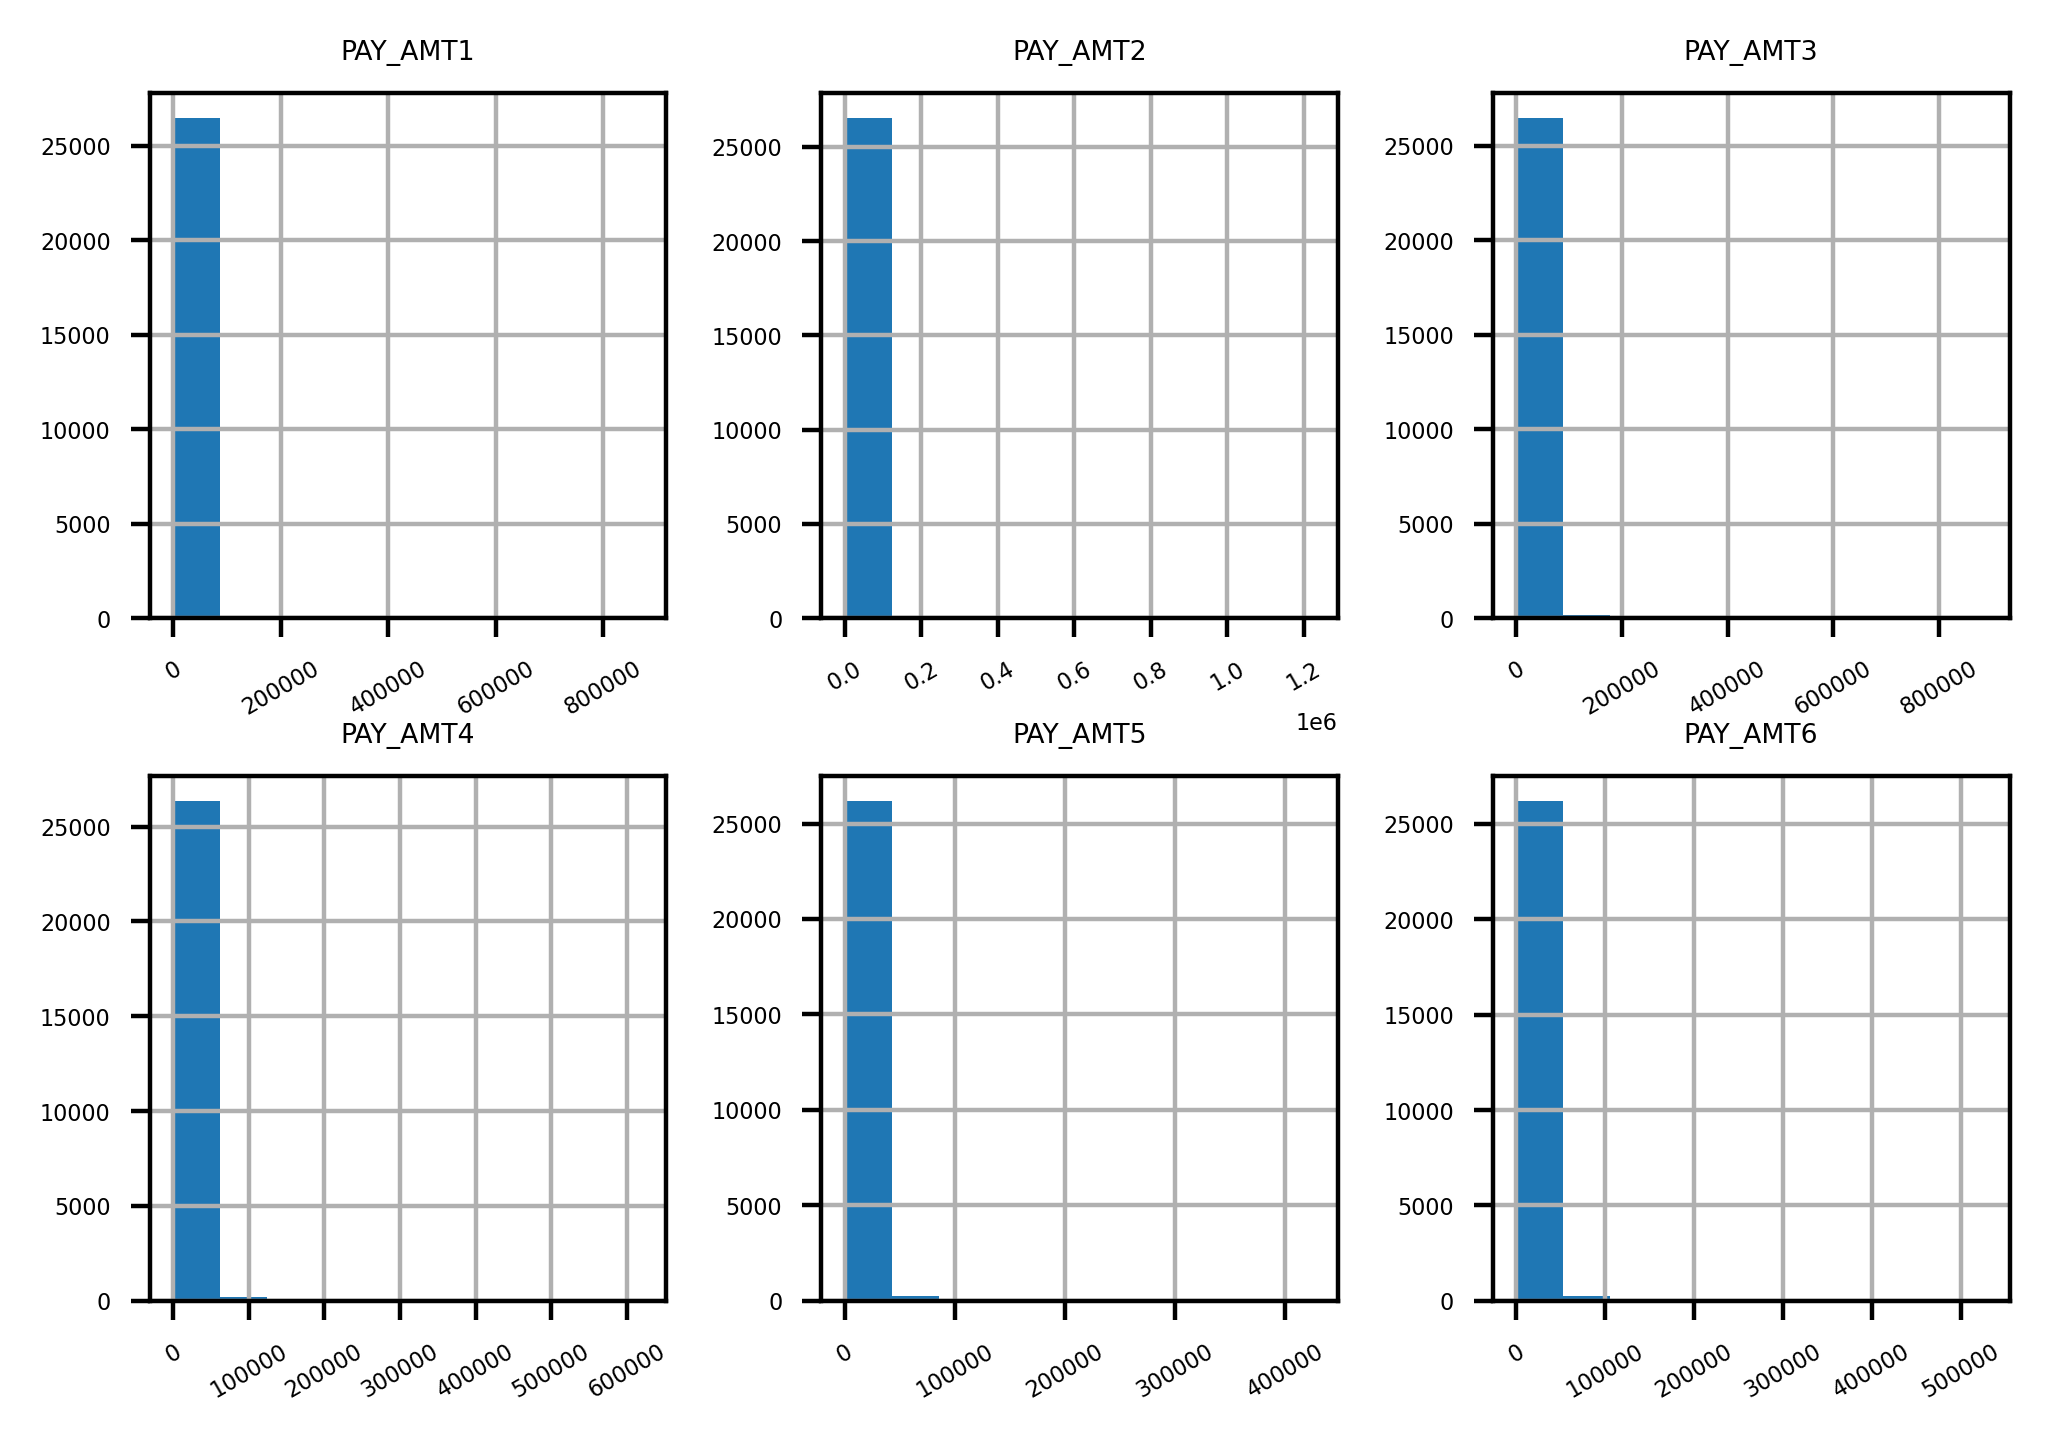

In [137]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [138]:
pay_zero_mask = df[pay_amt_feats] == 0

In [139]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [140]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

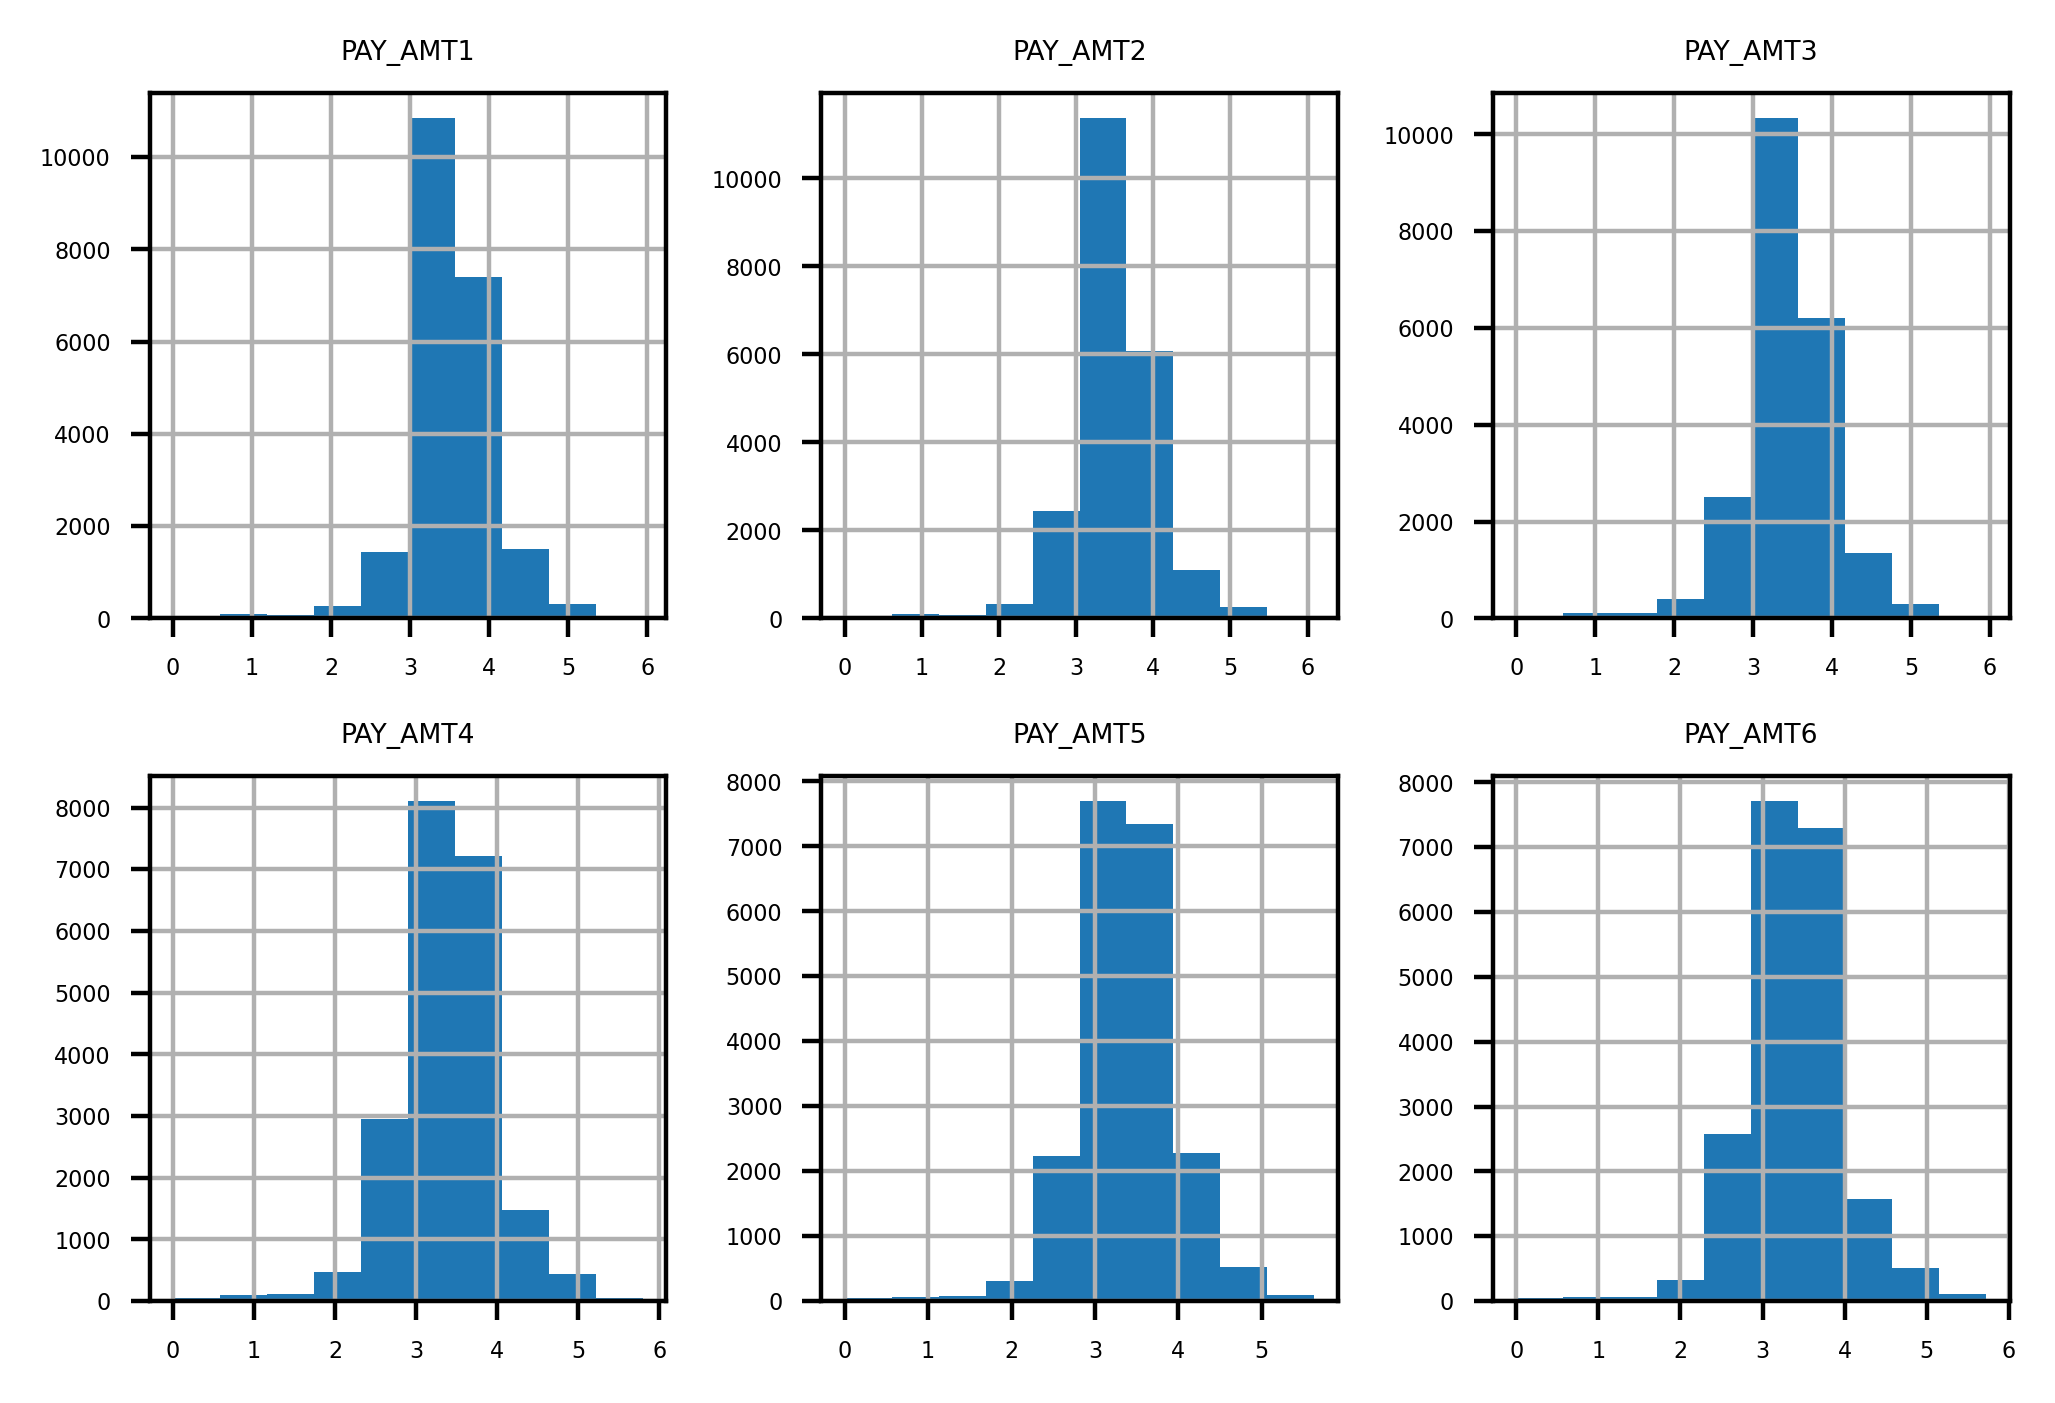

In [141]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10)\
                                 .hist(layout=(2,3))